In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [35]:
movies=pd.read_csv('C:\\Users\\mm\\Desktop\\movies.dat', sep = '::', engine='python',encoding="ISO-8859-1")
users=pd.read_csv('C:\\Users\\mm\\Desktop\\users.dat', sep = '::', engine='python',encoding="ISO-8859-1")
ratings=pd.read_csv('C:\\Users\\mm\\Desktop\\ratings.dat', sep = '::', engine='python',encoding="ISO-8859-1")

In [36]:
# movies=movies.drop(columns=["1"])
movies.head(20)

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
5,7,Sabrina (1995),Comedy|Romance
6,8,Tom and Huck (1995),Adventure|Children's
7,9,Sudden Death (1995),Action
8,10,GoldenEye (1995),Action|Adventure|Thriller
9,11,"American President, The (1995)",Comedy|Drama|Romance


In [37]:
# ratings=ratings.drop(columns=['1'])
ratings.head(10)

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
5,1,1287,5,978302039
6,1,2804,5,978300719
7,1,594,4,978302268
8,1,919,4,978301368
9,1,595,5,978824268


In [38]:
users.head(10)

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [39]:
movies.columns=['MovieIDs','Title_of_Movie','Genres']

In [40]:
ratings.columns=['UserID','MovieID','Rating','Timestamp']

In [41]:
users.columns=['UserID','Gender','Age','Occupation','Zip-code']

In [42]:
movies

,MovieIDs,Title_of_Movie,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [43]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [44]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [45]:
movies.isna().sum()

MovieIDs          0
Title_of_Movie    0
Genres            0
dtype: int64

In [46]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [47]:
ratings.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [48]:
sales_rating=pd.concat([movies,ratings,users],axis=1)
sales_rating.head(20)

,MovieIDs,Title_of_Movie,Genres,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,M,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,M,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,M,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,F,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595,5,978824268,11.0,F,25.0,1.0,04093


In [49]:
sales_rating.shape

(1000208, 12)

In [50]:
sales_rating.isna().sum()

MovieIDs          996326
Title_of_Movie    996326
Genres            996326
UserID                 0
MovieID                0
Rating                 0
Timestamp              0
UserID            994169
Gender            994169
Age               994169
Occupation        994169
Zip-code          994169
dtype: int64

In [51]:
sales_rating=sales_rating.dropna()

In [52]:
sales_rating.shape

(3882, 12)

In [53]:
sales_rating.isna().sum()

MovieIDs          0
Title_of_Movie    0
Genres            0
UserID            0
MovieID           0
Rating            0
Timestamp         0
UserID            0
Gender            0
Age               0
Occupation        0
Zip-code          0
dtype: int64

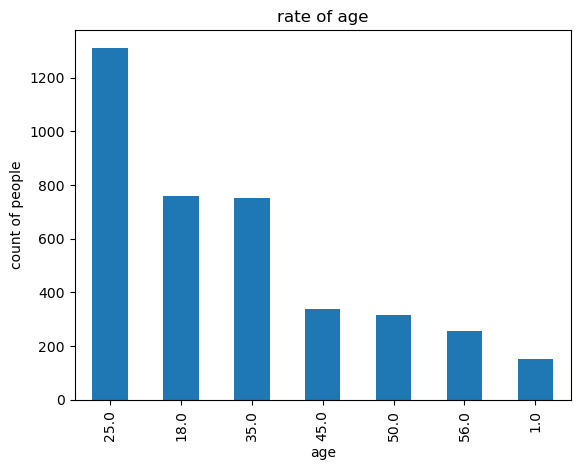

In [54]:
sales_rating['Age'].value_counts().plot(kind="bar")
plt.xlabel("age")
plt.ylabel("count of people")
plt.title("rate of age")
plt.show()

In [86]:
sales_rating=sales_rating.sort_values("Rating",ascending=False)

,MovieIDs,Title_of_Movie,Genres,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
1941,2011.0,Back to the Future Part II (1989),Comedy|Sci-Fi,18,2622,5,978152574,1943.0,M,18.0,4.0,91501
2018,2088.0,Popeye (1980),Adventure|Comedy|Musical,18,2083,5,978155293,2020.0,M,25.0,7.0,45011
2019,2089.0,"Rescuers Down Under, The (1990)",Animation|Children's,18,1282,5,978154834,2021.0,M,25.0,0.0,61364
684,694.0,"Substitute, The (1996)",Action,8,1673,5,978230356,686.0,M,18.0,4.0,27514
686,696.0,Butterfly Kiss (1995),Thriller,8,1678,5,978230649,688.0,M,56.0,13.0,13407
...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2288.0,"Thing, The (1982)",Action|Horror|Sci-Fi|Thriller,18,95,1,978153557,2220.0,F,50.0,3.0,95451-9554
374,379.0,Timecop (1994),Action|Sci-Fi,5,1721,1,978245763,376.0,M,35.0,1.0,80026
2217,2287.0,Them! (1954),Sci-Fi|Thriller|War,18,2391,1,978155685,2219.0,M,25.0,6.0,60060
365,370.0,Naked Gun 33 1/3: The Final Insult (1994),Comedy,5,3100,1,978245645,367.0,M,50.0,12.0,55421


<Axes: >

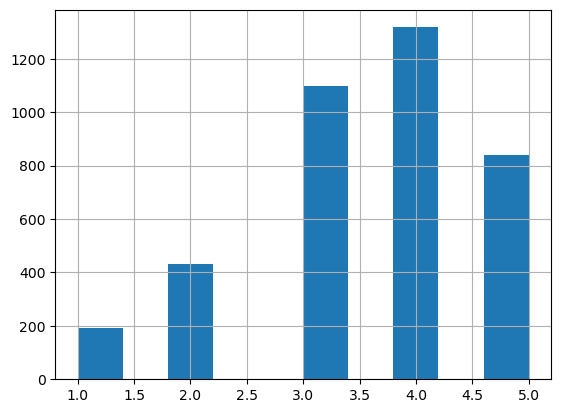

In [104]:
asd=sales_rating.groupby("MovieIDs")["Rating"].max().hist(bins=10)
asd

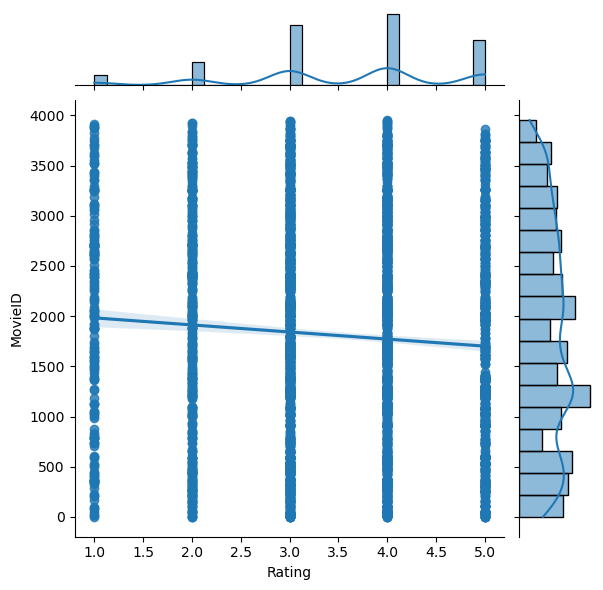

In [96]:
sns.jointplot(x="Rating",y="MovieID",data=sales_rating,kind="reg")

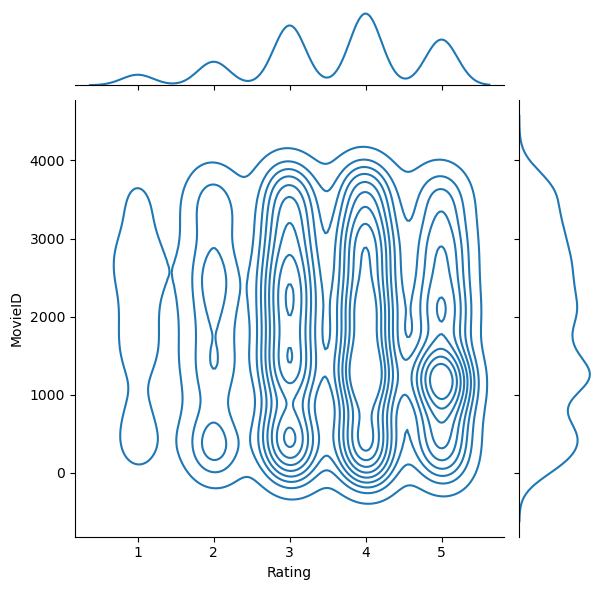

In [97]:
sns.jointplot(x="Rating",y="MovieID",data=sales_rating,kind="kde")

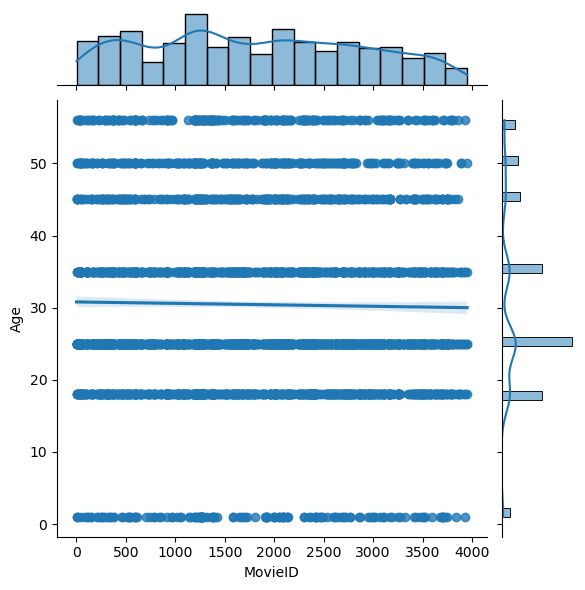

In [102]:
sns.jointplot(x="MovieID",y="Age",data=sales_rating,kind="reg")

C:\Users\mm\AppData\Local\Temp\ipykernel_11308\738866052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_rating.corr())


<Axes: >

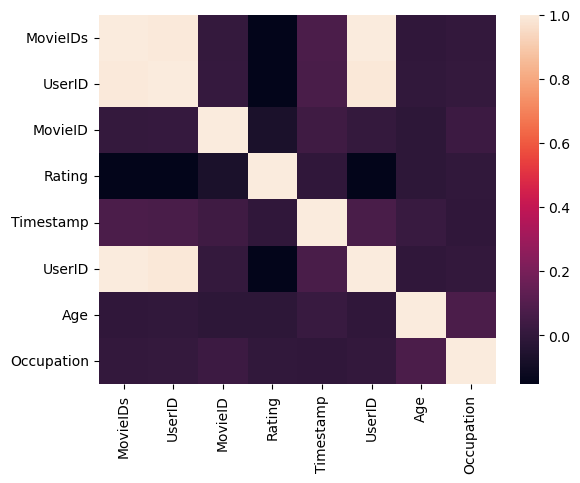

In [106]:
sns.heatmap(sales_rating.corr())

In [110]:
taining_Data=sales_rating[["MovieID","Age","Occupation"]]
testing_Data=sales_rating["Rating"]
x_train,x_test,y_train,y_test=train_test_split(taining_Data,testing_Data,test_size=0.2,random_state=42)

In [113]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
decision_tree.score(x_train,y_train)

0.977133655394525

In [115]:
decision_tree.predict(x_test)

array([4, 4, 3, 3, 4, 4, 3, 4, 5, 1, 3, 5, 4, 3, 1, 3, 2, 5, 4, 4, 4, 5,
       3, 3, 4, 3, 4, 4, 2, 5, 5, 4, 4, 3, 3, 3, 5, 5, 3, 3, 4, 3, 5, 5,
       4, 5, 3, 4, 5, 5, 2, 4, 1, 2, 4, 1, 5, 4, 5, 5, 4, 2, 4, 4, 4, 5,
       4, 3, 4, 4, 4, 5, 5, 1, 5, 4, 3, 3, 4, 4, 4, 3, 2, 3, 5, 4, 2, 1,
       5, 2, 5, 4, 1, 5, 4, 2, 5, 5, 4, 3, 5, 2, 5, 5, 2, 5, 4, 4, 2, 4,
       5, 3, 4, 4, 5, 3, 3, 4, 1, 3, 4, 3, 4, 3, 5, 5, 2, 4, 1, 5, 3, 2,
       4, 2, 5, 4, 4, 4, 4, 5, 4, 5, 3, 4, 3, 1, 5, 3, 3, 3, 3, 2, 4, 3,
       3, 2, 3, 4, 5, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 5, 5, 5, 3,
       5, 5, 3, 3, 3, 1, 3, 3, 5, 5, 4, 5, 4, 3, 4, 2, 3, 2, 5, 5, 3, 2,
       4, 3, 4, 4, 5, 4, 1, 4, 4, 3, 5, 5, 1, 3, 2, 5, 4, 4, 4, 5, 3, 3,
       1, 5, 5, 5, 4, 1, 3, 1, 5, 3, 5, 2, 5, 3, 3, 4, 5, 4, 3, 3, 3, 3,
       3, 2, 3, 3, 4, 4, 4, 3, 3, 5, 3, 3, 3, 4, 4, 4, 3, 5, 2, 3, 4, 3,
       3, 3, 1, 4, 3, 3, 5, 5, 3, 5, 1, 5, 4, 3, 3, 3, 3, 3, 5, 3, 3, 3,
       4, 3, 4, 4, 5, 5, 5, 3, 2, 5, 5, 4, 4, 4, 5,

In [116]:
print(y_test)

3432    3
1018    4
1941    5
3614    5
1200    1
       ..
650     4
1850    5
3381    2
1187    4
175     3
Name: Rating, Length: 777, dtype: int64
